In [1]:
import pandas as pd
import numpy as np

# Load the dataset 
df = pd.read_csv("C:\\Users\\Nidhi\\OneDrive\\Desktop\\globaldata.csv")

In [6]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2083
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator       1691 non-null   object 
 1   ParentLocation  1691 non-null   object 
 2   Location        1691 non-null   object 
 3   Period          1691 non-null   int64  
 4   Value           1691 non-null   int32  
 5   Precipitation   1691 non-null   float64
 6   Temperature     1691 non-null   float64
 7   Humidity        1691 non-null   float64
 8   Population      1691 non-null   int64  
dtypes: float64(3), int32(1), int64(2), object(3)
memory usage: 125.5+ KB


In [3]:
df['Value'] = df['Value'].str.replace(' ', '').astype(int)

In [4]:
print(df['Value'].dtype)

int32


In [5]:
# remove outliers 

import pandas as pd
import numpy as np

# assume 'df' is your DataFrame

Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dff = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

print(dff)

                              Indicator         ParentLocation     Location  \
0     Number of confirmed malaria cases  Eastern Mediterranean  Afghanistan   
1     Number of confirmed malaria cases  Eastern Mediterranean  Afghanistan   
2     Number of confirmed malaria cases  Eastern Mediterranean  Afghanistan   
3     Number of confirmed malaria cases  Eastern Mediterranean  Afghanistan   
4     Number of confirmed malaria cases  Eastern Mediterranean  Afghanistan   
...                                 ...                    ...          ...   
2075  Number of confirmed malaria cases                 Africa     Zimbabwe   
2078  Number of confirmed malaria cases                 Africa     Zimbabwe   
2080  Number of confirmed malaria cases                 Africa     Zimbabwe   
2081  Number of confirmed malaria cases                 Africa     Zimbabwe   
2083  Number of confirmed malaria cases                 Africa     Zimbabwe   

      Period   Value  Precipitation  Temperature  H

In [10]:
from scipy.stats import spearmanr

# Define the columns to analyze
parameters = ['Precipitation', 'Temperature', 'Humidity']

# Create a dictionary to store correlation results
correlations = {}

# Calculate Spearman correlation for each parameter
for param in parameters:
    corr, _ = spearmanr(dff['Value'], dff[param])
    correlations[param] = corr

# Print the correlation results
for param, corr in correlations.items():
    print(f"Spearman correlation between malaria value and {param}: {corr:.3f}")

Spearman correlation between malaria value and Precipitation: 0.255
Spearman correlation between malaria value and Temperature: 0.324
Spearman correlation between malaria value and Humidity: 0.141


In [11]:
# Define the weather parameters
parameters = ['Precipitation', 'Temperature', 'Humidity']

# Calculate Spearman correlations
correlation_data = {param: [dff[['Value', param]].corr(method='spearman').loc['Value', param]] for param in parameters}
correlation_df = pd.DataFrame(correlation_data, index=['Spearman Correlation']).T


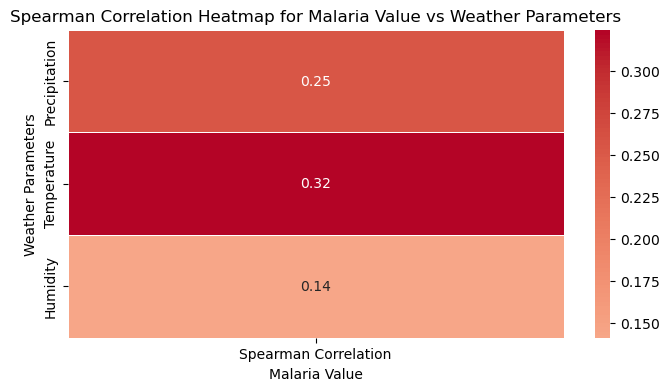

In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 4))

# Create the heatmap
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Spearman Correlation Heatmap for Malaria Value vs Weather Parameters')
plt.xlabel('Malaria Value')
plt.ylabel('Weather Parameters')

plt.show()

In [135]:
# Naive Bayes classifier


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error, r2_score, classification_report, f1_score
import numpy as np

# Load the dataset
#df = pd.read_csv("C:\\Users\\Nidhi\\OneDrive\\Desktop\\testmalaria.csv")

# Prepare the data for regression analysis
X = dff[['Precipitation', 'Humidity','Population']]
y = dff['Value']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test)

# Classification Part
# Define a threshold to classify the number of cases as high or low
threshold = y.median()
y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)
y_pred_class = np.where(y_pred > threshold, 1, 0)

# Calculate F1 score
f1 = f1_score(y_test_class, y_pred_class)
print(f'F1 Score: {f1}')

# Classification report
print(classification_report(y_test_class, y_pred_class))

F1 Score: 0.688622754491018
              precision    recall  f1-score   support

           0       0.62      0.79      0.70       151
           1       0.79      0.61      0.69       188

    accuracy                           0.69       339
   macro avg       0.70      0.70      0.69       339
weighted avg       0.71      0.69      0.69       339



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Assuming dff is already loaded with the dataset
# Prepare the data for regression analysis
X = dff[['Precipitation', 'Humidity', 'Temperature', 'Population']]
y = dff['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a threshold to classify the number of cases as high or low
threshold = y.median()

# Binarize the target variable based on the threshold
y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)

# Fit the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
gb_model.fit(X_train, y_train_class)

# Predict on the test set
y_pred_class = gb_model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test_class, y_pred_class)
print(f'F1 Score: {f1}')

# Classification report
print(classification_report(y_test_class, y_pred_class))


F1 Score: 0.8877284595300262
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       151
           1       0.87      0.90      0.89       188

    accuracy                           0.87       339
   macro avg       0.87      0.87      0.87       339
weighted avg       0.87      0.87      0.87       339



                           Indicator         ParentLocation     Location  \
0  Number of confirmed malaria cases  Eastern Mediterranean  Afghanistan   
1  Number of confirmed malaria cases  Eastern Mediterranean  Afghanistan   
2  Number of confirmed malaria cases  Eastern Mediterranean  Afghanistan   
3  Number of confirmed malaria cases  Eastern Mediterranean  Afghanistan   
4  Number of confirmed malaria cases  Eastern Mediterranean  Afghanistan   

   Period   Value  Precipitation  Temperature  Humidity  Population  
0    2000   94475         222.32        12.56     41.11    19542982  
1    2001   50850         205.64        13.41     39.06    19688632  
2    2002  414611         307.55        13.05     42.31    21000256  
3    2003  360940         353.28        12.48     44.40    22645130  
4    2004  242022         319.09        13.19     42.67    23553551  
            Period          Value  Precipitation  Temperature     Humidity  \
count  1691.000000    1691.000000    1691.000

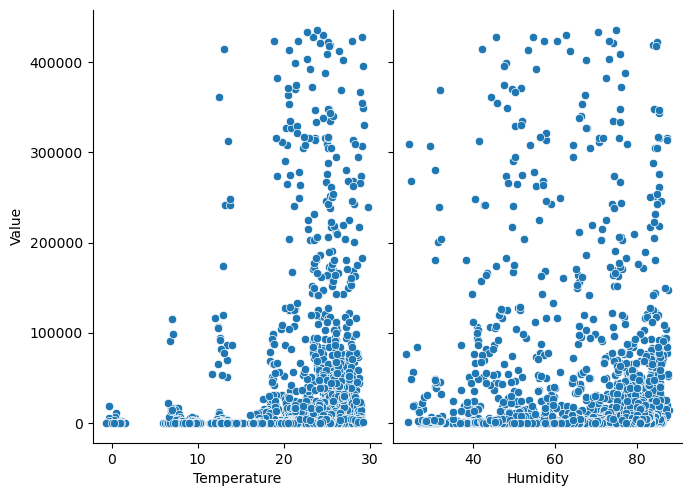

                Value  Temperature  Humidity
Value        1.000000     0.163191 -0.019364
Temperature  0.163191     1.000000  0.015047
Humidity    -0.019364     0.015047  1.000000


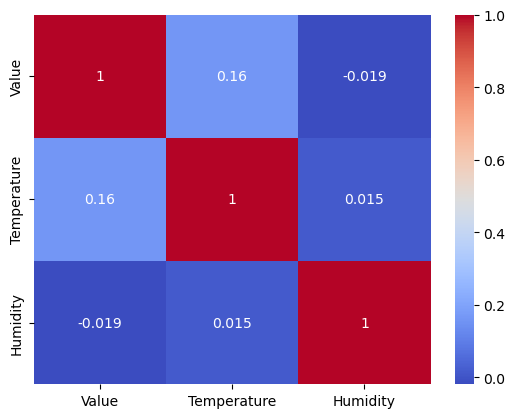

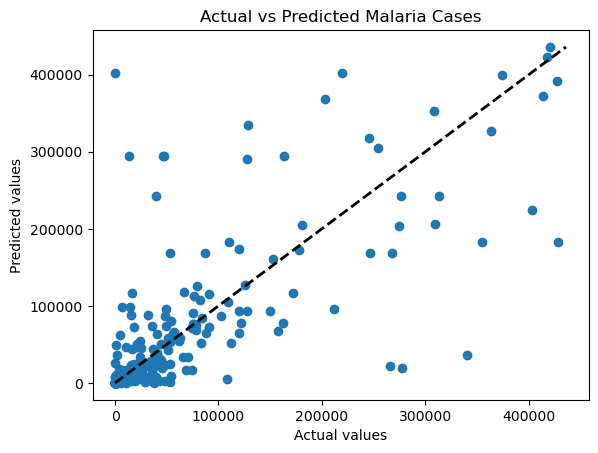

F1 Score: 0.9105691056910568
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       151
           1       0.93      0.89      0.91       188

    accuracy                           0.90       339
   macro avg       0.90      0.90      0.90       339
weighted avg       0.90      0.90      0.90       339



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, f1_score
import numpy as np

# Load the dataset
#df = pd.read_csv("C:\\Users\\Nidhi\\OneDrive\\Desktop\\testmalaria.csv")

# Display the first few rows of the dataset
print(dff.head())

# Exploratory Data Analysis
# Descriptive statistics
print(dff.describe())

# Check for missing values
print(dff.isnull().sum())

# Visualize the relationship between weather variables and malaria cases
sns.pairplot(dff, x_vars=['Temperature', 'Humidity'], y_vars='Value', height=5, aspect=0.7)
plt.show()

# Correlation matrix
corr_matrix = dff[['Value', 'Temperature', 'Humidity']].corr()
print(corr_matrix)

# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Prepare the data for regression analysis
X = dff[['Precipitation', 'Humidity', 'Temperature', 'Population']]
y = dff['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest Regressor
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Visualize the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Malaria Cases')
#plt.show()

# add middle line
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect prediction')

plt.show()
# Classification Part
# Define a threshold to classify the number of cases as high or low
threshold = y.median()
y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)
y_pred_class = np.where(y_pred > threshold, 1, 0)

# Calculate F1 score
f1 = f1_score(y_test_class, y_pred_class)
print(f'F1 Score: {f1}')0.93

# Classification report
print(classification_report(y_test_class, y_pred_class))


                           Indicator         ParentLocation     Location  \
0  Number of confirmed malaria cases  Eastern Mediterranean  Afghanistan   
1  Number of confirmed malaria cases  Eastern Mediterranean  Afghanistan   
2  Number of confirmed malaria cases  Eastern Mediterranean  Afghanistan   
3  Number of confirmed malaria cases  Eastern Mediterranean  Afghanistan   
4  Number of confirmed malaria cases  Eastern Mediterranean  Afghanistan   

   Period   Value  Precipitation  Temperature  Humidity  Population  
0    2000   94475         222.32        12.56     41.11    19542982  
1    2001   50850         205.64        13.41     39.06    19688632  
2    2002  414611         307.55        13.05     42.31    21000256  
3    2003  360940         353.28        12.48     44.40    22645130  
4    2004  242022         319.09        13.19     42.67    23553551  
            Period          Value  Precipitation  Temperature     Humidity  \
count  1691.000000    1691.000000    1691.000

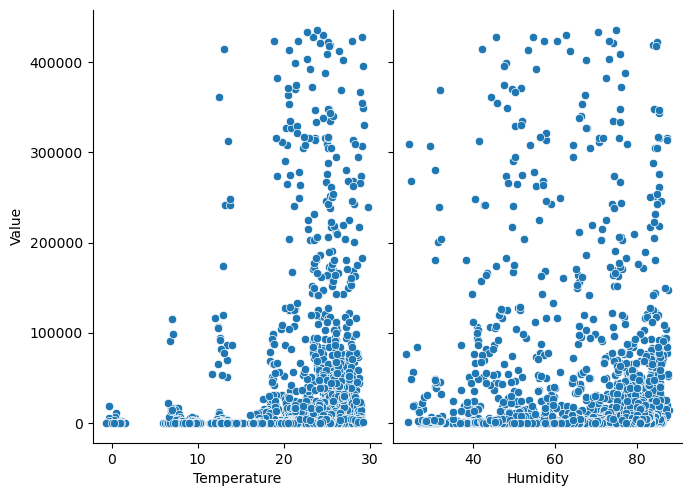

                Value  Temperature  Humidity
Value        1.000000     0.163191 -0.019364
Temperature  0.163191     1.000000  0.015047
Humidity    -0.019364     0.015047  1.000000


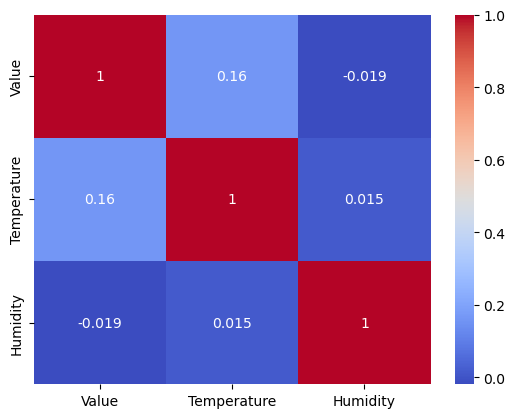

Selected features: Index(['Precipitation', 'Humidity', 'Population'], dtype='object')
Feature importance: [0.33419066 0.32923365 0.33657568]


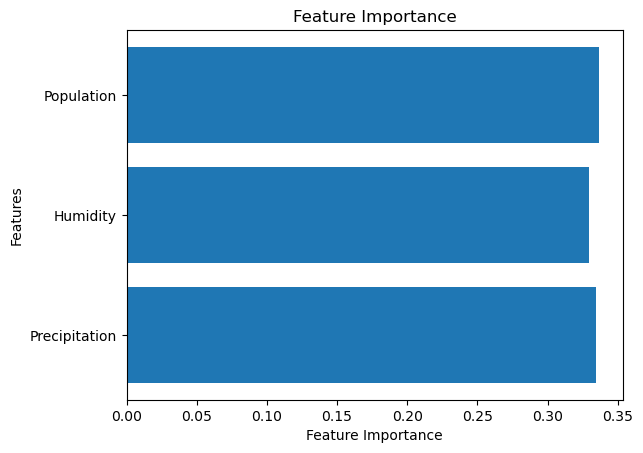

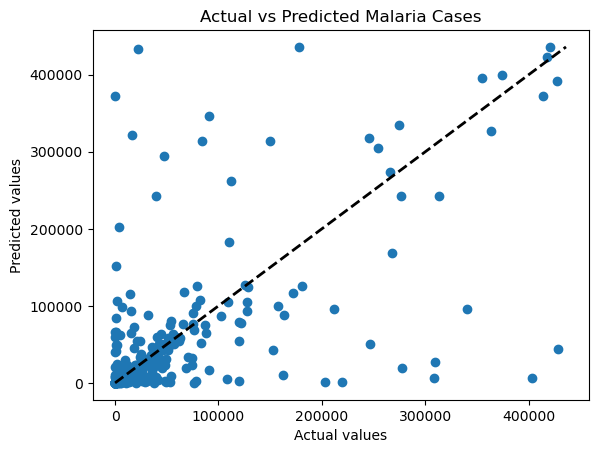

F1 Score: 0.8571428571428572
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       151
           1       0.87      0.85      0.86       188

    accuracy                           0.84       339
   macro avg       0.84      0.84      0.84       339
weighted avg       0.84      0.84      0.84       339



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

# Load the dataset
#df = pd.read_csv("C:\\Users\\Nidhi\\OneDrive\\Desktop\\testmalaria.csv")

# Display the first few rows of the dataset
print(dff.head())

# Exploratory Data Analysis
# Descriptive statistics
print(dff.describe())

# Check for missing values
print(dff.isnull().sum())

# Visualize the relationship between weather variables and malaria cases
sns.pairplot(dff, x_vars=['Temperature', 'Humidity'], y_vars='Value', height=5, aspect=0.7)
plt.show()

# Correlation matrix
corr_matrix = dff[['Value', 'Temperature', 'Humidity']].corr()
print(corr_matrix)

# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Prepare the data for regression analysis
X = dff[['Precipitation', 'Humidity', 'Temperature', 'Population']]
y = dff['Value']

# Feature selection using SelectKBest
selector = SelectKBest(f_classif, k=3)
X_selected = selector.fit_transform(X, y)

# Get the feature names of the selected features
selected_features = X.columns[selector.get_support(indices=True)]
print(f'Selected features: {selected_features}')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit the Random Forest Regressor
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = rf_model.feature_importances_
print(f'Feature importance: {feature_importance}')

# Plot feature importance
plt.barh(range(len(selected_features)), feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.yticks(range(len(selected_features)), selected_features)
plt.show()

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Visualize the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Malaria Cases')
#plt.show()

# add middle line
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect prediction')

plt.show()
# Classification Part
# Define a threshold to classify the number of cases as high or low
threshold = y.median()
y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)
y_pred_class = np.where(y_pred > threshold, 1, 0)

# Calculate F1 score
f1 = f1_score(y_test_class, y_pred_class)
print(f'F1 Score: {f1}')

# Classification report
print(classification_report(y_test_class, y_pred_class))

In [161]:
print(y_pred_class)

[1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 0 1 1 1]


In [160]:
# Determine the threshold
threshold = y.median()

# Function to predict 'Value' based on new inputs and convert to binary
def predict_value_binary(precipitation,humidity, temperature, population):
    # Prepare the input data as a DataFrame
    input_data = pd.DataFrame({
        'Precipitation': [precipitation],
        'Humidity': [humidity],
        'Temperature': [temperature],
        'Population': [population]
    })
    
    # Make the prediction
    predicted_value = rf_model.predict(input_data)[0]
    
    # Convert the predicted value to binary based on the threshold
    predicted_class = 1 if predicted_value > threshold else 0
    
    return predicted_class

# Example usage
precipitation = 0.0
humidity = 6.0
temperature = 5.0
population = 10000

predicted_class = predict_value_binary(precipitation, temperature, humidity, population)
print(f'The predicted binary class is: {predicted_class}')

The predicted binary class is: 1


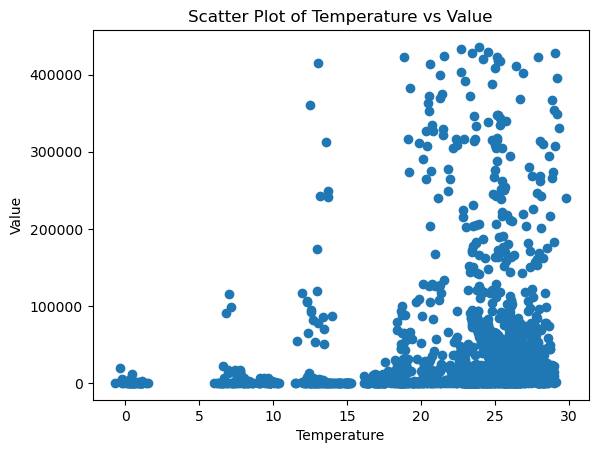

In [145]:
import matplotlib.pyplot as plt

# Assume df is a Pandas DataFrame with columns 'temperature' and 'value'

plt.scatter(dff['Temperature'], dff['Value'])
plt.xlabel('Temperature')
plt.ylabel('Value')
plt.title('Scatter Plot of Temperature vs Value')
plt.show()

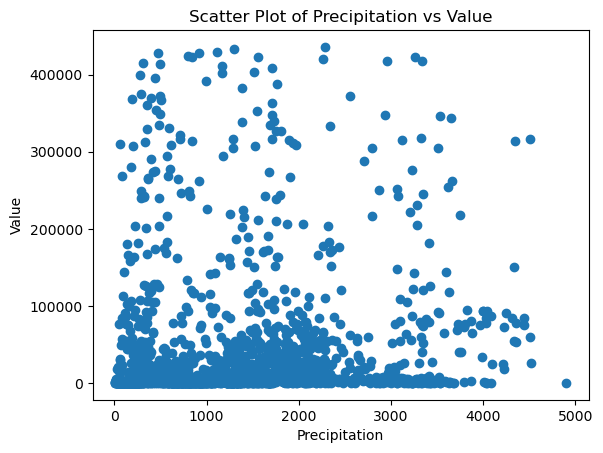

In [146]:
plt.scatter(dff['Precipitation'], dff['Value'])
plt.xlabel('Precipitation')
plt.ylabel('Value')
plt.title('Scatter Plot of Precipitation vs Value')
plt.show()

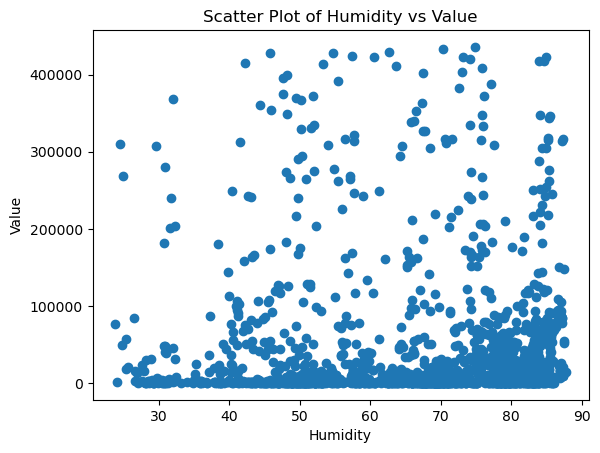

In [147]:
plt.scatter(dff['Humidity'], dff['Value'])
plt.xlabel('Humidity')
plt.ylabel('Value')
plt.title('Scatter Plot of Humidity vs Value')
plt.show()